In [1]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_with_labels.csv')

In [3]:
df

,image,class
0,/work1/niejep/SummerSchoolChallenge2022/fungii...,0
1,/work1/niejep/SummerSchoolChallenge2022/fungii...,0
2,/work1/niejep/SummerSchoolChallenge2022/fungii...,1
3,/work1/niejep/SummerSchoolChallenge2022/fungii...,2
4,/work1/niejep/SummerSchoolChallenge2022/fungii...,2
...,...,...
5400,/work1/niejep/SummerSchoolChallenge2022/fungii...,140
5401,/work1/niejep/SummerSchoolChallenge2022/fungii...,23
5402,/work1/niejep/SummerSchoolChallenge2022/fungii...,23
5403,/work1/niejep/SummerSchoolChallenge2022/fungii...,75


In [4]:
g = df.groupby('class')

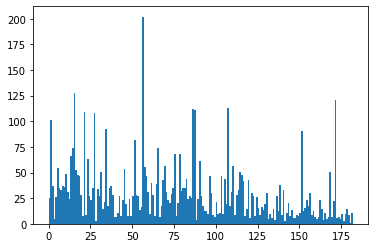

In [5]:
plt.hist(df['class'], bins=df['class'].max())
plt.show()

In [6]:
c = df['class'].to_numpy()

In [7]:
c_bins = np.bincount(c)

In [8]:
sort = np.argsort(c_bins)[::-1]

In [9]:
c_sorted = c_bins[sort]

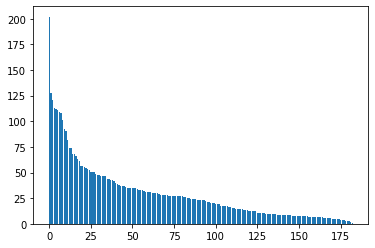

In [10]:
plt.bar(range(len(c_sorted)), c_sorted)
plt.show()

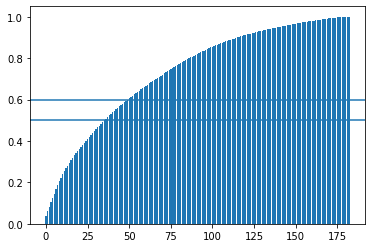

In [11]:
plt.bar(range(len(c_sorted)), np.cumsum(c_sorted) / len(df))
plt.axhline(0.5)
plt.axhline(0.6)
plt.show()

In [12]:
c[sort]

array([38,  6, 56, 11, 57, 58, 12, 18,  0, 24, 84, 11, 44,  5, 52, 49,  4,
       14, 55, 42, 23, 39,  2, 24,  7, 14, 21, 34,  1,  8, 65, 40, 56, 29,
        9, 55, 56, 69, 46, 66, 42, 43, 24,  1,  1, 26,  1, 53, 25, 17, 19,
        1, 54, 13, 41, 64,  2, 53, 47,  3, 34,  5, 14, 71, 19, 60, 21, 10,
       27, 64, 36,  8,  2, 30, 36, 20, 15, 56, 15, 72, 10, 73,  2, 47,  0,
       34, 56,  3, 55, 48, 16, 88, 44, 32, 69, 61, 23, 57, 48, 51, 10, 33,
       63, 81, 64, 55, 14, 45, 74, 10, 64, 86, 77, 89, 68, 22, 67, 81, 37,
       75,  9, 56, 59, 59, 85, 14, 21,  5, 69, 79, 48, 14, 27, 62, 21, 90,
       41,  9, 13, 86, 14, 16, 42,  6, 27, 21, 80, 67, 50, 15,  8, 11, 31,
       35, 83, 31, 29, 34, 11, 16, 43, 28, 61, 87, 13, 31, 11, 76, 82, 70,
       86,  2, 19, 75, 14, 18, 11,  0, 91, 19, 78, 92, 51], dtype=int64)

In [13]:
c_sorted

array([202, 128, 121, 113, 112, 111, 109, 108, 101,  92,  91,  82,  74,
        74,  68,  68,  66,  63,  61,  56,  56,  55,  54,  53,  52,  51,
        51,  51,  49,  48,  48,  47,  47,  47,  47,  44,  44,  43,  43,
        42,  40,  39,  38,  37,  37,  37,  36,  35,  35,  35,  35,  35,
        35,  34,  33,  33,  33,  32,  31,  31,  31,  31,  30,  30,  30,
        30,  29,  28,  28,  28,  28,  28,  27,  27,  27,  27,  27,  27,
        27,  27,  27,  26,  26,  25,  25,  24,  24,  24,  24,  23,  23,
        23,  23,  23,  22,  21,  21,  20,  20,  20,  19,  19,  19,  17,
        17,  17,  17,  17,  16,  16,  15,  15,  14,  14,  14,  14,  14,
        13,  13,  13,  12,  12,  12,  12,  12,  11,  11,  11,  11,  11,
        10,  10,  10,  10,  10,  10,  10,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   6,   6,   6,   6,
         6,   5,   5,   5,   5,   5,   4,   4,   4,   3,   3,   

In [14]:
data_sort = np.load('data_sort_patmjen.npy')

In [15]:
# df = df.set_index('image')
df['image'] = df['image'].str.split('/').str[-1]
df

,image,class
0,2237852381-222754.JPG,0
1,2237852388-108.JPG,0
2,2237852964-74877.JPG,1
3,2237853192-298146.JPG,2
4,2237853950-148876.JPG,2
...,...,...
5400,2238592737-337201.JPG,140
5401,2251781174-114683.JPG,23
5402,2265771997-338115.JPG,23
5403,2265772114-114838.JPG,75


In [16]:
df_preds = pd.DataFrame({'image': data_sort['im_names'], 'pred': data_sort['pred_labels']})
df_preds['image'] = df_preds['image'].str.replace('/data/AIDatasets/fungi/DF20M/', '')

In [17]:
g = df_preds.groupby('pred')

In [18]:
g.describe()

image                                   
     count unique                    top freq
pred                                         
0      422    422  2237852325-148523.JPG    1
1      577    577   2237852204-74704.JPG    1
2      234    234  2237852116-222680.JPG    1
3       27     27  2237852132-297902.JPG    1
4       34     34  2237870260-150860.JPG    1
...    ...    ...                    ...  ...
177     17     17  2237903062-300369.JPG    1
178     17     17    2237919198-3095.JPG    1
179     15     15   2238085019-80208.JPG    1
181      8      8  2238143890-155516.JPG    1
182     10     10  2238148417-305310.JPG    1

[179 rows x 4 columns]

In [19]:
pred_count = g.count()

In [20]:
pred_counts = pred_count.sort_values('image', ascending=False)
pred_counts.head(10)

,image
pred,
67,1688
107,1623
171,1069
34,1015
56,1015
116,937
69,934
78,753
65,744


In [21]:
g_class = df.groupby('class')
class_count = g_class.count()
class_counts = class_count.sort_values('image', ascending=False)
class_counts.head(10)

,image
class,
56,202
15,128
171,121
107,113
86,112
87,111
21,109
27,108
1,101


In [22]:
(pred_count / class_count).sort_values('image', ascending=False).head(10)

,image
67,99.294118
155,41.411765
130,24.333333
116,22.309524
162,20.565217
150,19.545455
170,17.863636
94,17.583333
33,17.095238
122,16.925926


<AxesSubplot:xlabel='pred'>

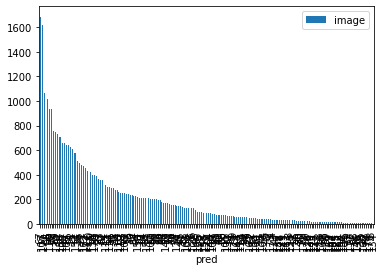

In [23]:
pred_counts.plot.bar()

In [24]:
df_all = pd.merge(df, df_preds, on='image')
df_all

,image,class,pred
0,2237852381-222754.JPG,0,163
1,2237852388-108.JPG,0,53
2,2237852964-74877.JPG,1,1
3,2237853192-298146.JPG,2,2
4,2237853950-148876.JPG,2,96
...,...,...,...
5400,2265771997-338115.JPG,23,67
5401,2265772114-114838.JPG,75,67
5402,2265772114-114838.JPG,75,67
5403,2269197570-188935.JPG,23,67


In [25]:
from sklearn import metrics

In [26]:
m = metrics.confusion_matrix(df_all['class'], df_all['pred'])

In [27]:
# np.where(m[142])

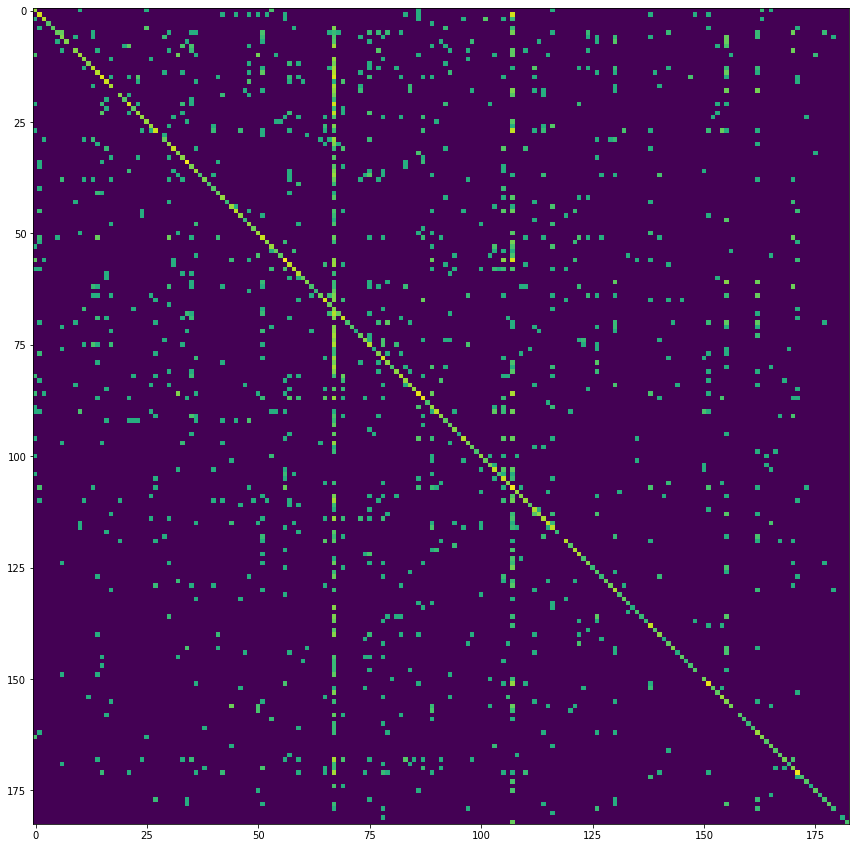

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
ax.imshow(np.log(m + 0.0005))
plt.show()

C:\Users\nje\AppData\Local\Temp/ipykernel_16532/994953485.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.diagonal(m) / m.sum(0))


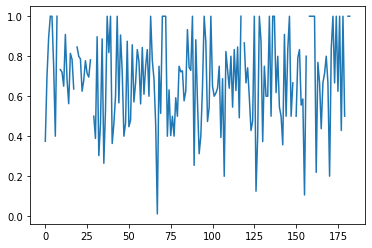

In [29]:
plt.plot(np.diagonal(m) / m.sum(0))

In [30]:
np.nanargmin((np.diagonal(m) / m.sum(0))[100:125]) + 100

C:\Users\nje\AppData\Local\Temp/ipykernel_16532/3477649289.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.nanargmin((np.diagonal(m) / m.sum(0))[100:125]) + 100


107

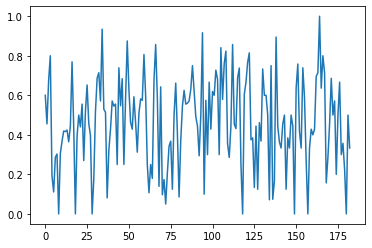

In [31]:
plt.plot(np.diagonal(m) / m.sum(1))

In [32]:
m[:, 67].sum()

882

In [33]:
m[:, 107].sum()

431

In [34]:
m[:, 75].sum()

62

In [35]:
m[:, 51].sum()

79

In [36]:
m[:, 56].sum()

133

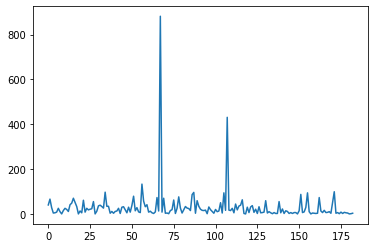

In [37]:
plt.plot(m.sum(0))

In [38]:
np.where(m.sum(0) > 50)

(array([  1,  15,  16,  21,  27,  34,  51,  56,  57,  65,  67,  69,  75,
         78,  86,  87,  89, 105, 107, 116, 130, 138, 151, 155, 162, 171],
       dtype=int64),)

In [39]:
np.where(m.sum(0) / m.sum(1) > 10)

(array([67], dtype=int64),)

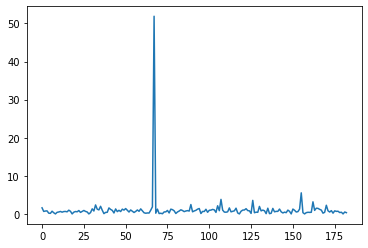

In [40]:
plt.plot(m.sum(0) / m.sum(1))

In [41]:
print(metrics.classification_report(df_all['class'], df_all['pred']))

              precision    recall  f1-score   support

           0       0.38      0.60      0.46        25
           1       0.70      0.46      0.55       101
           2       0.89      0.68      0.77        37
           3       1.00      0.80      0.89         5
           4       1.00      0.19      0.32        26
           5       0.75      0.11      0.19        54
           6       0.40      0.29      0.33        35
           7       1.00      0.30      0.47        33
           8       0.00      0.00      0.00        37
           9       0.73      0.31      0.43        36
          10       0.72      0.37      0.49        49
          11       0.65      0.42      0.51        31
          12       0.91      0.42      0.57        24
          13       0.68      0.42      0.52        66
          14       0.56      0.36      0.44        74
          15       0.81      0.45      0.58       128
          16       0.78      0.77      0.78        52
          17       0.64    

C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu